## Introduction

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques of Exploratory Data Analysis (EDA), we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
- **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
- **All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
1. **Approved**: The Company has approved loan Application
2. **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
3. **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).
4. **Unused offer**:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

## Business Objectives 

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## Data Understanding


This dataset has 3 files as explained below: 
1. **application_data.csv**  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. **previous_application.csv** contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.
3. **columns_description.csv** is data dictionary which describes the meaning of the variables.


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Current application

In [ ]:
df_application_current = pd.read_csv('/kaggle/input/loan-defaulter/application_data.csv')
df_application_current.head()

In [ ]:
df_application_current.info()

In [ ]:
df_application_current.describe()

### Handaling missing values in columns


In [ ]:
# Count missing values column wise
df_application_current.isnull().sum()

In [ ]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_application_current.columns[(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

In [ ]:
# Delete the columns having more than 30% missing values
df_application_current = df_application_current.drop(cols_30_percent_missing_values,axis=1)

In [ ]:
df_application_current.columns

##### List and delete the columns, which are not much relevant for the analysis

In [ ]:
cols_irrelevant = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
cols_irrelevant

In [ ]:
# Delete the columns which are irrelevant for the analysis
df_application_current = df_application_current.drop(cols_irrelevant,axis=1)

In [ ]:
df_application_current.shape

In [ ]:
df_application_current.columns

#### Treating Missing Values in Rows

In [ ]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_application_current[df_application_current.isnull().sum(axis=1) > (len(df_application_current.columns)//2)].index)

In [ ]:
# Percent of missing values in columns
(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)),2))

In [ ]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(df_application_current[np.isnan(df_application_current['EXT_SOURCE_2']) & np.isnan(df_application_current['EXT_SOURCE_3'])])

In [ ]:
# As there are only 230 such records we can delete those.
# Note:- As we have total 307511 records deleting only 230 records will not affect our further analysis
df_application_current = df_application_current[(~(np.isnan(df_application_current['EXT_SOURCE_2']) & np.isnan(df_application_current['EXT_SOURCE_3'])))]

In [ ]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(df_application_current.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

We can see that the difference between mean and median is quite narrow for both the columns. Also, the variation from 25th to 75th percentile is equally distributed. 
Thus, let's impute the missing values by the mean value of `EXT_SOURCE_2` and `EXT_SOURCE_3` respectively.

In [ ]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
df_application_current.loc[np.isnan(df_application_current['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = df_application_current['EXT_SOURCE_2'].mean()
df_application_current.loc[np.isnan(df_application_current['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = df_application_current['EXT_SOURCE_3'].mean()


In [ ]:
(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)),2))

In [ ]:
# Treating missing values in AMT_GOODS_PRICE
df_application_current['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

In [ ]:
df_application_current.boxplot(column =['AMT_GOODS_PRICE']) 

We see the standard deviation of `AMT_GOODS_PRICE` is very high. Also there are good amount of outliers in the colum as well.
So, imputing missing values with mean or median will be biased in this case.
Hence, it is better to remove the rows with missing `AMT_GOODS_PRICE`. Infact these rows are only 0.09% of the whole records.

In [ ]:
df_application_current = df_application_current[~np.isnan(df_application_current['AMT_GOODS_PRICE'])]

We have 5 columns for the number of enquiries to Credit Bureau about the client.
It doesn't make much sense to count the number for a very short period of time such as an hour or a day or a week before the application date. On the other had it also make lesser sense if we count the number for a very long period of time. 
Hence, it will be feasible for us if we take the count for a quater, which is not too short or too long time period.
So, we have to do two things now:-
1. We will handle missing data for the column `AMT_REQ_CREDIT_BUREAU_QRT`
2. We will delete the column for the count of hour, day, week, month and year.

In [ ]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

This is an integer type variable, and thus have values 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median (1.53 enquires does not make sense!).
Thus, we need to impute them by the mode - the most common occurring value if that approach is feasible.

In [ ]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'] = df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
df_application_current['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

The most common value of ```AMT_REQ_CREDIT_BUREAU_QRT``` is 0, so let's impute the NaNs by that.

In [ ]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
df_application_current.loc[pd.isnull(df_application_current['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [ ]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
df_application_current = df_application_current.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [ ]:
(round(100*(df_application_current.isnull().sum()/len(df_application_current.index)),2))

We now have a dataframe with no missing values. Let's finally look at how many rows we have lost in the process.
At the begining we had `307511` rows.

In [ ]:
df_application_current.shape

In [ ]:
# Percentage of rows lost
(100 - 100*(len(df_application_current.index)/307511))

We just have lost 0.16% rows in the entire data cleaning process

#### Converting `DAYS_BIRTH` column into `AGE` column for readablity and analysis

In [ ]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
df_application_current['AGE'] = abs(df_application_current['DAYS_BIRTH']//365)


In [ ]:
# Drop 'DAYS_BIRTH' column
df_application_current = df_application_current.drop(['DAYS_BIRTH'],axis=1)

#### Converting `DAYS_EMPLOYED` column into `YEARS_EMPLOYED` column for readablity and analysis

In [ ]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
df_application_current['YEARS_EMPLOYED'] = abs(df_application_current['DAYS_EMPLOYED']//365)

In [ ]:
# Drop 'DAYS_EMPLOYED' column
df_application_current = df_application_current.drop(['DAYS_EMPLOYED'],axis=1)

In [ ]:
df_application_current.head()

### Removing outliers

In [ ]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = df_application_current[col].quantile(0.25)
    q3 = df_application_current[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_current = df_application_current.loc[(df_application_current[col] > range_low) & (df_application_current[col] < range_high)]

df_application_current.shape

In [ ]:
# Percentage of rows lost
round((100 - 100*(len(df_application_current.index)/307511)),2)

Though we lost around `10%` rows in the outliers handling exercise, we got rid of the outliers for fair analysis of the data.  

### Checking Data Imbalance

In [ ]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_application_current[col].value_counts().plot(kind='bar');
    plt.title(col)

We can see that there is data imbalance in below columns:-
1. TARGET -  There are very few defaulters(1) compare to non defaulters(0)
2. NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans
3. NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
4. NAME_FAMILY_STATUS - Most of the loans applied by Married people.
5. NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner


In [ ]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    df_application_current[col_name].value_counts().plot(kind='bar');
    plt.title(col_name)

As we can see that except **FLAG_DOCUMENT_3** all the columns have negligible count of 1s.
So we are removing all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3

In [ ]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
df_application_current.drop('FLAG_DOCUMENT_2',axis=1,inplace=True)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    df_application_current.drop(col,axis=1,inplace=True)

#### Binning of `AGE`,  `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `EXT_SOURCE_SCORE` columns
`

#### Creating three age groups - Young, Mid age and Senior citizen

In [ ]:
df_application_current['AGE'].describe()

In [ ]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [ ]:
#Creating new column AGE_GROUP
df_application_current['AGE_GROUP'] = df_application_current['AGE'].apply(age_group)
df_application_current.head()

#### Creating three credit amount groups - High, medium and low

In [ ]:
round(df_application_current['AMT_CREDIT'].describe(),2)

In [ ]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [ ]:
#Creating new column AGE_GROUP
df_application_current['CREDIT_GROUP'] = df_application_current['AMT_CREDIT'].apply(credit_group)
df_application_current.head()

#### Creating three income groups - Hign, medium and Low

In [ ]:
df_application_current['AMT_INCOME_TOTAL'].describe()

In [ ]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [ ]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
df_application_current['INCOME_GROUP'] = df_application_current['AMT_INCOME_TOTAL'].apply(income_group)
df_application_current.head()

For the simplification of analysis of Normalized score from external data source, we are taking average of two different external data sources (EXT_SOURCE_2 and EXT_SOURCE_3) and creating a column called **EXT_SOURCE_SCORE**


In [ ]:
df_application_current['EXT_SOURCE_SCORE'] = round(((df_application_current['EXT_SOURCE_2'] + df_application_current['EXT_SOURCE_3'])/2),2)
df_application_current.head()

In [ ]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_application_current.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

#### Creating three External source score groups - High, Medium and Low

In [ ]:
df_application_current['EXT_SOURCE_SCORE'].describe()

In [ ]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [ ]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
df_application_current['EXT_SCORE_CATEGORY'] = df_application_current['EXT_SOURCE_SCORE'].apply(ext_source_group)
df_application_current.head()

In [ ]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
df_application_current = df_application_current[~(df_application_current['CODE_GENDER'] == 'XNA')]

### Divide data into two sets 
##### Client with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [ ]:
# Client with payment difficulties (Target=1)
df_current_target_1 = df_application_current[df_application_current['TARGET'] == 1]
df_current_target_1.head()

In [ ]:
# Client with all other cases (Target=0)
df_current_target_0 = df_application_current[df_application_current['TARGET'] == 0]
df_current_target_0.head()

In [ ]:
df_current_target_0.shape

In [ ]:
df_current_target_1.shape

## Analysis

### Univariate analysis for Unordered categorical variables

#### Count of defaulters and non-defaulters on the basis of gender

In [ ]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')

##### Analysis
1. **Defaluters** - We can see that females are slightly more in number of defaulters than male.
2. **Non-defaluters** - The same pattern continues for non-defaluters as well. The females are more in number here than male.

#### Defaulters and non-defaulters on the basis of Loan type

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

##### Analysis
We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#### Defaulters and non-defaulters on the basis of Income type

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Analysis
1. **Defaulters** - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
2. **Non-defaulters** - Similarly here also working people are more in number who are not defaulted.

#### Defaulters and non-defaulters on the basis of Education type

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. **Defaulters** - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
2. **Non defaulters** - Here also Secondary/Secondary sepcial are more in numbers.

#### Defaulters and non-defaulters on the basis of Family status

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

### Univariate analysis for continious variables

#### Defaulters and non-defaulters on the basis of credit amount of the loan

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_CREDIT'],hist=False)

##### Analysis
1. **Defaulters** - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
2. **Non defaulters** - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

#### Defaulters and non-defaulters on the basis of gender and their total income

In [ ]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = df_current_target_1[df_current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = df_current_target_0[df_current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    

##### Analysis
1. **Defaulters** - We can notice by looking at the pattern that for being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.
2. **Non defaulters** - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.

#### Defaulters and non-defaulters on the basis of Loan annuity

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_ANNUITY'],hist=False)

##### Analysis
We can notice from the above distribution plot that in both the cases the loan annuity is concentrated more from 10000 to 40000. 

### Segmented Univariate analysis for ordered categorical variables

#### Percentage of age group applicants defaulted and not defaulted
The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and not defaulted.

In [ ]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Young') & (df_application_current['TARGET'] == 1)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Mid Age') & (df_application_current['TARGET'] == 1)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Senior') & (df_application_current['TARGET'] == 1)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Senior']),2)

In [ ]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

In [ ]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Young') & (df_application_current['TARGET'] == 0)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Mid Age') & (df_application_current['TARGET'] == 0)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(df_application_current[(df_application_current['AGE_GROUP'] == 'Senior') & (df_application_current['TARGET'] == 0)])/len(df_application_current[df_application_current['AGE_GROUP'] == 'Senior']),2)

In [ ]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

In [ ]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.
2. **Non defaulters** - There is not much difference in the likelihood for non defaulters in the age groups.

#### Credit amount group

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Surprisingly low credited amount groups are more defaulters.
2. **Non defaulters** - As expected low credit amount groups are more in number, who were not defaulted.

#### Income group

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - Surprisingly the High income group is more in number to be defaulted, then Medium and then Low.
2. **Non defaulters** - Here as expected the count of non defaulters more in High income group and less in low income group.

#### Normalized score from external data source

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_0)
plt.title('Non-Defaulters')

##### Analysis
1. **Defaulters** - No surprise that low scorer from external data source are more defaulters. Also, the medium scorer are as likely defaulter as low scorer.
2. **Non defaulters** - Medium scorers are no more defaulted than High scorer. As expected the Low scorers are lesser in number.

## Bivariate analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [ ]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [ ]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_1.head()

In [ ]:
# Corelation matrix
df_corr_target_1.corr() 

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

##### Corelation of non defaulters 

In [ ]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_current_target_0[corr_cols]
df_corr_target_0.head()

In [ ]:
# Corelation matrix
df_corr_target_0.corr() 

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns for non defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)


**Conclusion** - 
We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

### Bivariate analysis on continious variable

#### Credit amount of the loan on the basis of client income for both male and female

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=df_current_target_0)
plt.title('Non Defaulters')

##### Analysis
1. **Defaulters** - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. **Non defaulters** - We can hardly figure out any pattern out of this.

#### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=df_current_target_0)
plt.title('Non Defaulters')

##### Analysis
We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [ ]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

#### Defaulters

In [ ]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
4. Higher income group have more loan amount credited.
5. Clients having higher external score have more loan amount.

#### Non-defaulters

In [ ]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The mid age group got more amount of loan credited cmpared to young and senior citizen.
4. Higher income group have more loan amount credited and lower the lowest.
5. Clients having higher external score have more loan amount.
6. Surprisingly the `unemployed` people have spike in credit amount of loan
7. The `Married` people have more loan amount credited.

### Analysis of two segmented variables 

 #### Income group and gender

In [ ]:
df_application_current.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

##### Analysis
We can see that `Males` are more likely defaulted than `Females` accross all income groups.

#### Education and gender

In [ ]:
df_application_current.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

##### Analysis
1. `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
2. The `Higher` educated people are less defaulted.
3. Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

In [ ]:
df_application_current.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
1. Medium credit amount group are highly defaulted in all income groups.
2. High credit amount groups are less likely to default in all income groups.

#### Credit amount group and Age group

In [ ]:
df_application_current.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

##### Analysis
1. Young clients with medium and low credit amount group are highly defaulted.
2. Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

In [ ]:
df_application_current.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

##### Analysis
1. `Young` clients are more defaulted than Mid age and senior.
2. Young low income people are more defaulted.
3. For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

In [ ]:
df_application_current.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

##### Analysis
1. No surprise the unemployed clients are more defaulted.
2. Clients with maternity leave are expected to be defaulted more.
3. The default rate is lesser in all other professions.
4. Males are more defaulted with their respective professions compared to females.

#### Family status and age group

In [ ]:
df_application_current.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Across all family status the `Young` clients are more defaulted and `Senior citizen` are less.

#### Family status and gender

In [ ]:
df_application_current.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

##### Analysis
Across all family status the `Male` clients are more defaulted than `Female`.

# Previous application

In [ ]:
df_application_previous = pd.read_csv('/kaggle/input/loan-defaulter/previous_application.csv')
df_application_previous.head()

In [ ]:
df_application_previous.shape

In [ ]:
df_application_previous.info()

In [ ]:
df_application_previous.describe()

#### Handaling missing values in columns

**Replacing all the XNA and XAP to np.null**
Because looks like these values entered in the application as blank or may be not applicable.

In [ ]:
df_application_previous.replace('XNA',np.nan,inplace=True)
df_application_previous.replace('XAP',np.nan,inplace=True)

In [ ]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_application_previous.columns[(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

In [ ]:
# Delete the columns having more than 30% missing values
df_application_previous = df_application_previous.drop(cols_30_percent_missing_values,axis=1)

##### List and delete the columns, which are not much relevant for the analysis

In [ ]:
df_application_previous.columns

In [ ]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [ ]:
# Delete the columns which are irrelevant for the analysis
df_application_previous = df_application_previous.drop(cols_irrelevant,axis=1)

In [ ]:
df_application_previous.shape

#### Treating Missing Values in Rows

In [ ]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_application_previous[df_application_previous.isnull().sum(axis=1) > (len(df_application_previous.columns)//2)].index)

In [ ]:
# Percent of missing values in columns
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

In [ ]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['CNT_PAYMENT']) & np.isnan(df_application_previous['AMT_GOODS_PRICE'])])

As there are only 333855 such records we can delete those.
Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis.
It is better to delete such rows instead of imputing values and making the analysis biased.

In [ ]:
df_application_previous = df_application_previous[(~(np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['AMT_GOODS_PRICE']) & np.isnan(df_application_previous['CNT_PAYMENT'])))]

In [ ]:
df_application_previous.shape

In [ ]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

In [ ]:
# Count the rows for which AMT_ANNUITY is empty
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY'])])

In [ ]:
# As there are only 38380 rows we can delte those records
df_application_previous = df_application_previous[~(np.isnan(df_application_previous['AMT_ANNUITY']))]

In [ ]:
df_application_previous.shape

In [ ]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

In [ ]:
df_application_previous.shape

### Removing outliers

In [ ]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier: 
    q1 = df_application_previous[col].quantile(0.25)
    q3 = df_application_previous[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_prev = df_application_previous.loc[(df_application_previous[col] > range_low) & (df_application_previous[col] < range_high)]

df_application_prev.shape

In [ ]:
# Percentage of rows lost
round((100 - 100*(len(df_application_prev.index)/1670214)),2)

In our data cleaning excerise we have lost around `25%` rows. As this is huge dataset, we still have 1242076 records for analysis.

### Checking data imbalance

In [ ]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = df_application_prev )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

We can see that there is data imbalance in below columns:-
1. NAME_CONTRACT_TYPE - There are veru few `Revolving Loans`
2. NAME_CONTRACT_STATUS - There are very few `Refused` loans. Almost negligible `Canceled` loans.
3. NAME_CLIENT_TYPE - There are very few `New` applicant. Even fewer `Refreshed` applicants.
4. NAME_PORTFOLIO - Very few application for Cards and Cars
5. CHANNEL_TYPE - Except `Country-Wide`, `Credit and Cash offices` and `Stone` all other channels are very few in muber.

#### Converting `DAYS_DECISION` column into `MONTH_DECISION` column for readablity and analysis

In [ ]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
df_application_prev['MONTH_DECISION'] = abs(df_application_prev['DAYS_DECISION']//30)

In [ ]:
# Drop 'DAYS_DECISION' column
df_application_prev = df_application_prev.drop(['DAYS_DECISION'],axis=1)

In [ ]:
df_application_prev.head()

In [ ]:
df_application_prev.shape

### Merging Current application and Previous application dataset

In [ ]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [ ]:
# Creating a dataset from current application for merging 
df_current_to_merge = df_application_current[cols_current]
df_current_to_merge.head()

In [ ]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [ ]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = df_application_prev.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

In [ ]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

In [ ]:
df_merged.shape

In [ ]:
len(df_merged[np.isnan(df_merged['TARGET'])])

We can see that there are NaN values in the current application columns in the merged datasets. Because few `SK_ID_CURR` are present in the previous application dataset, but those IDs are not present in the current application dataset.
Eg:- `SK_ID_CURR == 176158` is present in the previous application but not in present.
We will remove those such records.

In [ ]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         

In [ ]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [ ]:
df_merged.head()

We can create a new derived column for what percentage of the applied amount was credited for each client. 
Derived column name :- `PERCENT_CREDIT`

In [ ]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

### Univariate analysis on unordered categorical variable

#### Previous Loan status

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')


##### Analysis
There are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

#### Client type

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')

##### Analysis
Mostly the applicants were `Repeater`

#### Portfolio of the previous applications

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')

##### Analysis
The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

#### Application channel type

In [ ]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')

##### Analysis
We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

### Univariate analysis for continious variables

#### Applied loan amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')

##### Analysis
Most of the applications were for the amount of below 250000 as we see from the above distribution.

#### Credited loan amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')

##### Analysis
The distribution of the credited amount of the loan was mostly in 250000 range.

#### Months took for the pervious application decision relative to the current application 

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')

##### Analysis
We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## Bivariate analysis

#### Corelation of relevant numerical columns

In [ ]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [ ]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

In [ ]:
# Corelation matrix
df_merged_corr.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT
2. AMT_APPLICATION and AMT_ANNUITY	
3. AMT_CREDIT and AMT_ANNUITY

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT
2. AMT_CREDIT and CNT_PAYMENT

### Bivariate analysis on continious variable

#### Application amount and credited amount

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)

##### Analysis
We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

#### Application amount and the month taken to take decision related to current application

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('AMT_APPLICATION','MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)

##### Analysis
We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application. 

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [ ]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

In [ ]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

##### Analysis
1. `Cash loans` are more credited in amount than Revolving and Consumer loans.
2. `Repeater` clients get more amount loan than new and refreshed clients.
3. The loan with portfolio `Cars` are more amount credited followed by `Cash`.
4. The credit amount of the loan is more from the application channel type as `car dealer` followed by `Channel of corporate sales`, `Credit and cash offices` and `Contact center`. The amount is very less for `Regional`, `Stone` and `Country-wide` channels.

#### Analysis of two segmented variables

#### Status and Client type

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )

##### Analysis
We see that the `Repeater` clients have more approved loans than `New` and `Refreshed` clients.

#### Current loan defaulter status with respect to previous loan application status

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### Current loan defaulter status with respect to previous loan application status and client types

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. We can see that the `Defaulters` are more for previously `Unused offers` loan status clients, who were `New`.
2. For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
3. For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
4. For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### Current loan defaulter status with respect to previous loan application status and age group

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. For all the previous status `Young` applicants are more defaulted.
2. For all the previous status `Senior` applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
2. For other application status more or less all the income groups are equally defaulted. 

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Most of the clients were defaulted, who previously applied loan for `Cards`.
2. For approved loan status the clients applied for `Cars` are less defaulted.
3. For `Refused` loan status the clients applied for `POS` are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

In [ ]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')

##### Analysis
1. Applicants with low external source score are highly defaulted.
2. Higher scorer applicants are very ulikely to default irrespective of their previous loan status.

# Business Recomendation 

## Current applications

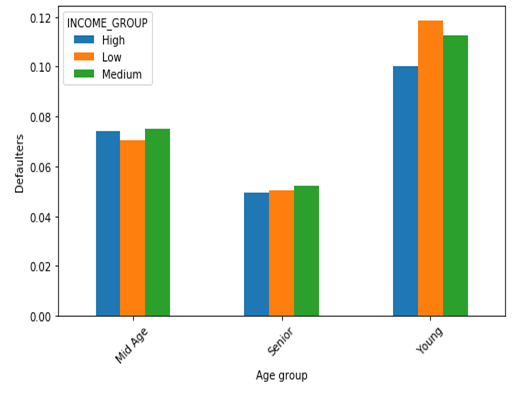
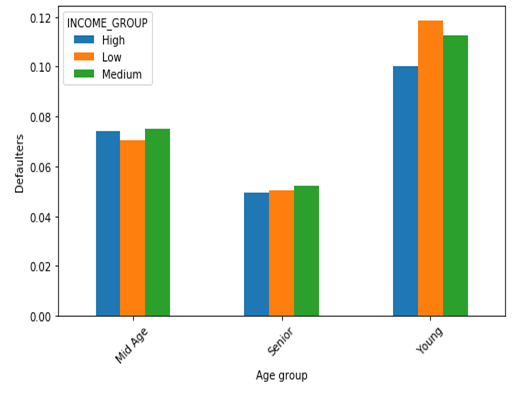

***Observations:-***
1. High income groups are less defaulter than comparatively lower income groups.
2. Mid age and senior people with all income groups are less defaulted.

***Recommendation:-***
1. Safer to grant loan for mid age and senior citizen clients with higher income. 
2. Risky to grant loans for young people with low income groups.

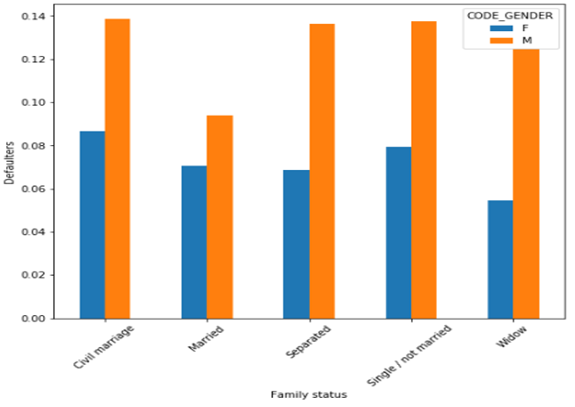
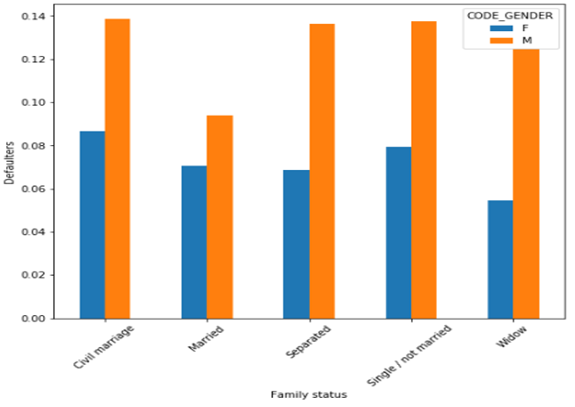

***Observations:-***
1. Senior people irrespective of family status are less likely to be defaulted.
2. Young people are more likely to be defaulted in all family status.
3. Males are more like to be defaulted than females.

***Recommendations:-***
1. Better to grant loan for senior citizen of all family status.
2. It is risky to grant loan for single, separated and civil marriage young men.

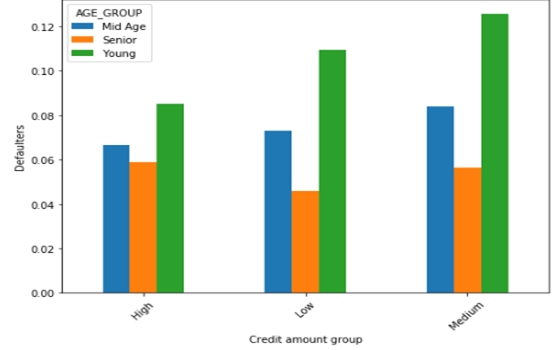
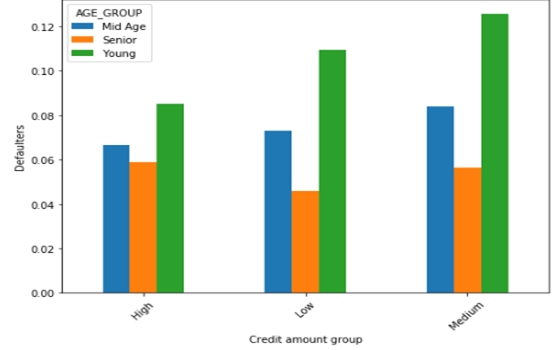

***Observations:-***
1. Across all income groups clients with medium amount credited is highly defaulted followed by low and high credit amount.
2. Young clients with medium and low amount credited are most likely defaulted.

***Recommendations:-***
1. Recommended to grant slightly higher amount of loan to all income groups.
2. It is very risky to grant medium and low amount of loan to young clients.


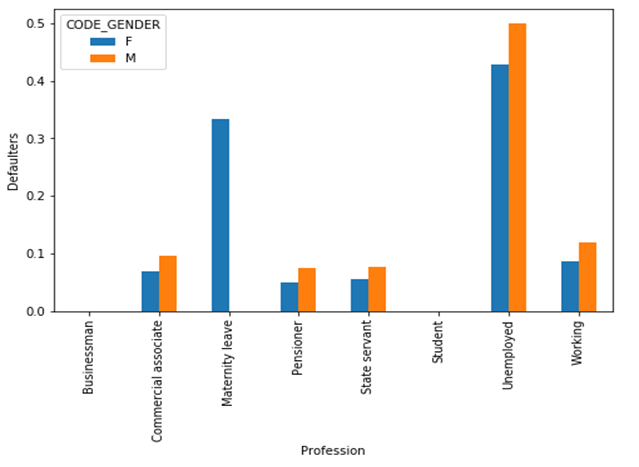
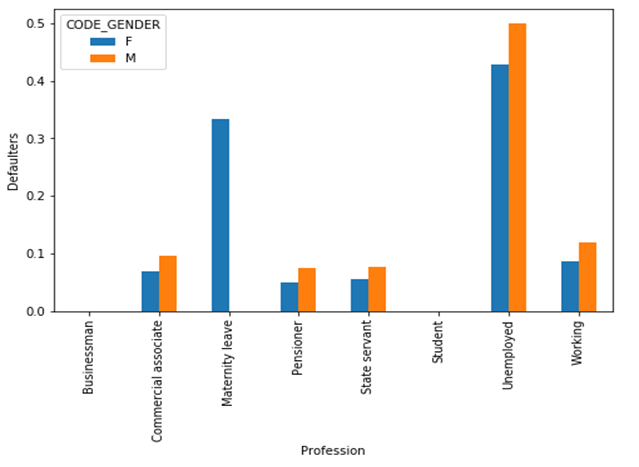

***Observations:-***

1. Higher educated people are less defaulted and lower secondary educated people are more.
2. Unemployed clients along with clients with maternity leave are heavily defaulted.

***Recommendations:-***

1. Safe to grant loans to higher educated clients across all profession except unemployed and women with maternity.


## Loan application status relations - Current and Previous

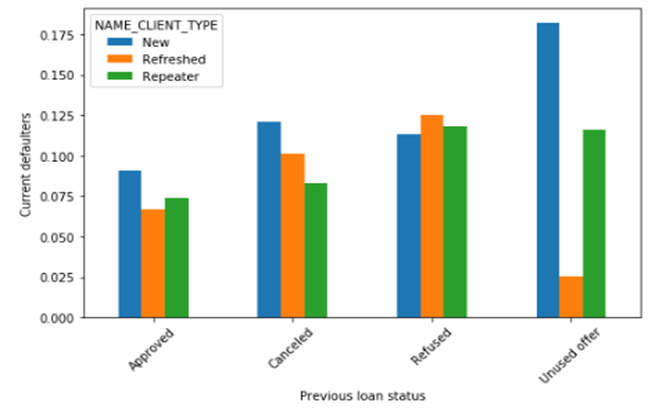
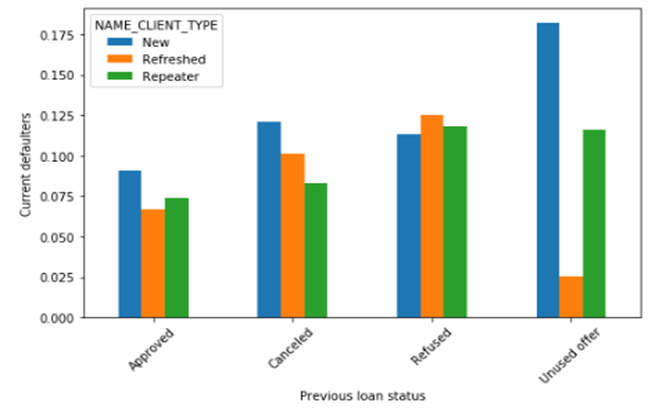

***Observations:-***

1. Previously refused and unused offer applications were more defaulted in male.
2. New clients with previously unused offer are more defaulted.

***Recommendations:-***

1. It is recommended to provide loans to previously approved females.
2. There is a risk to grant loans for clients, whose applications were refused or unused previously.


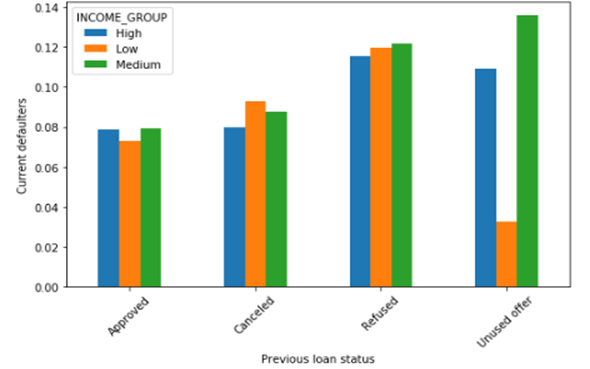
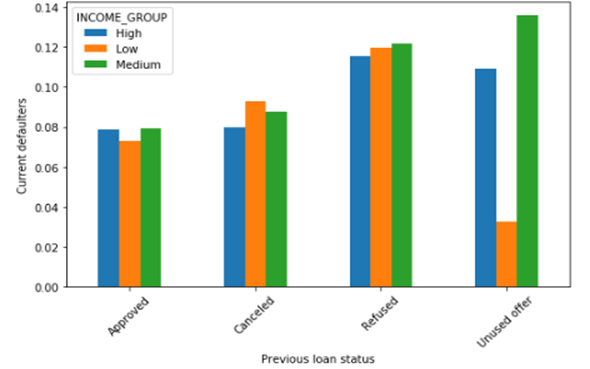

***Observations:-***

1. Young people, who were previously refused are mostly defaulted.
2. The senior citizens are less defaulted irrespective of their previous loan status.
3. In all income groups previously refused applicants are more defaulted.

***Recommendations:-***
1. Safer to grant loans for senior citizen.
2. Lesser risk to grant loans for approved applicants to all income groups.


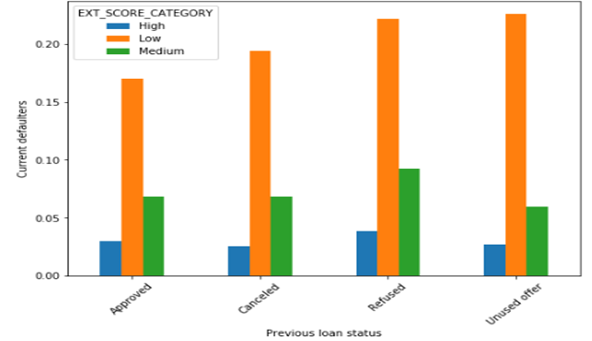
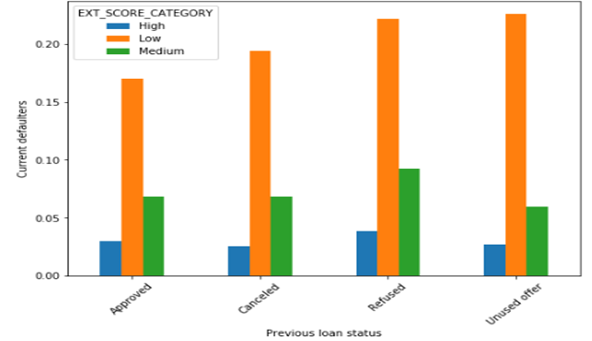

***Observations:-***

1. The previous applications for portfolio Cards and POS are mostly defaulted .
2. Previously refused applications for Cash are also defaulted in higher rate.
3. Low external source scorer are highly defaulted irrespective of their previous loan status.

***Recommendations:-***

1. It is safer to grant loans for any portfolio for previously approved applicants.
2. It is high risk to grant loans for applicants, who have poor external source score specially whose loan were previously refused, unused or cancel.


# Final Notes

***Highly recommended groups:-***

1. Approved clients in their previous applications.
2. Highly educated clients with higher income.
3. Clients with higher external source score.
4. Senior citizens in all categories.
5. Married clients compared to other family status.
6. Females are comparatively favourable than male.

***High risk groups:-***

1. Previously refused, cancelled or unused offer clients.
2. Low income groups with previously refused status.
3. Unemployed clients.
4. Poor external source scorer.
5. Young clients are comparatively riskier than mid age clients and senior citizens.
6. Lower secondary and secondary educated clients.